<a href="https://colab.research.google.com/github/FRANK-RAN/NeuralNetwork-Visualization/blob/main/NN_Architecture/ELEC_576_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)


# Creating the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    # BatchNorm used to standardize the inputs to each layer and increasing epoch acc. yield
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model w/ optimizer & cost funct.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model                         # epochs & valdation specified
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3791 - accuracy: 0.8853 - val_loss: 0.1489 - val_accuracy: 0.9563
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2135 - accuracy: 0.9362 - val_loss: 0.1216 - val_accuracy: 0.9627
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1716 - accuracy: 0.9477 - val_loss: 0.0969 - val_accuracy: 0.9721
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1520 - accuracy: 0.9536 - val_loss: 0.1031 - val_accuracy: 0.9688
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1348 - accuracy: 0.9585 - val_loss: 0.0891 - val_accuracy: 0.9722
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9613 - val_loss: 0.0928 - val_accuracy: 0.9715
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - l

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

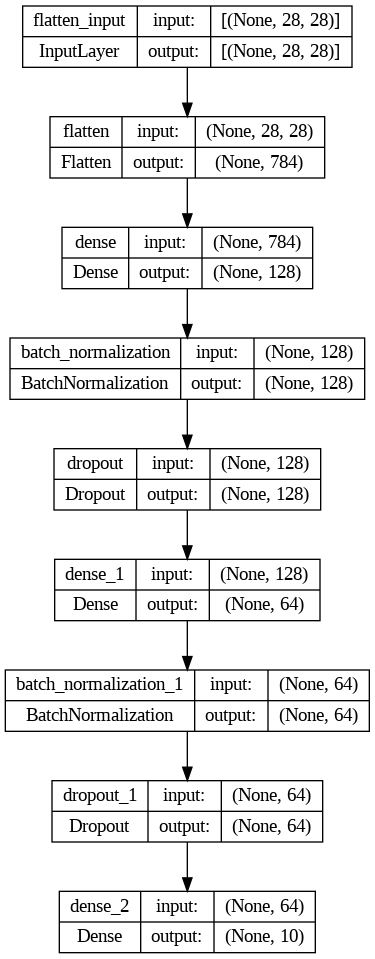

In [3]:
model.summary()

# Visualizing the model architecture
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


In [4]:
# Example for plotting gradients (this is a simplified version)
# You would typically do this inside a custom training loop

with tf.GradientTape() as tape:
    predictions = model(x_train[:1])  # Use a batch of data
    loss = tf.keras.losses.categorical_crossentropy(y_train[:1], predictions)

gradients = tape.gradient(loss, model.trainable_variables)
# Now you can plot these gradients

# For filters, access the weights of the convolutional layers
# Since your model doesn't have conv layers, this step isn't applicable here
